# 제주 핫 플레이스 지도에 표시하기

### 1. 데이터 준비

In [1]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving 제주핫플레이스.csv to 제주핫플레이스.csv


In [5]:
import pandas as pd
raw_df = pd.read_csv(filename)
raw_df

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."
...,...,...,...,...,...
8364,Now it's purple😆💜수색 넘 이쀼리 🤭 올해는 아퓨지말구 즐거운 일만 가...,2019-01-01,42,NaN,"['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그..."
8365,.간다간다간다#제주 #친정여행 #겨울방학 #제주여행앞머리는 괜히 전날 잘라서 또순이...,2019-01-01,50,NaN,"['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'..."
8366,2019년 모두 복 많이많이 받고 풍요로운 한해 보내길 ♥️#사진좀찍으시는님덕에건져...,2019-01-01,68,Jeju,"['#사진좀찍으시는님덕에건져또', '#이순간']"
8367,2018.12.25 ⠀룸에 의자가 두개 밖에 없어서 ⠀이현이는 유모차에 앉아서 식사...,2019-01-01,70,NaN,[]


In [7]:
location_counts = raw_df.place.value_counts().to_frame()
location_counts

,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59
...,...
색달식당,1
Jamae Guksu,1
신풍목장,1
수카사,1


In [8]:
location_counts.to_csv('location_counts.csv')

In [10]:
loc_df = pd.read_csv('location_counts.csv')
loc_df.columns = ['지명','빈도']
loc_df

,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59
...,...,...
1022,색달식당,1
1023,Jamae Guksu,1
1024,신풍목장,1
1025,수카사,1


### 2. 카카오 검색 API를 이용한 장소 검색
- 키워드 장소 검색

In [12]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving kakaoapikey.txt to kakaoapikey.txt


In [13]:
with open(filename) as f:
  api_key = f.read()

In [14]:
import requests
from urllib.parse import quote

In [15]:
keyword = '합정 스타벅스'
serch_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{serch_url}?query={quote(keyword)}'
# Authorization: KakaoAK {REST_API_KEY}
result = requests.get(url,
            headers={"Authorization": f'KakaoAK {api_key}'}).json()

In [17]:
result['documents'][0]

{'address_name': '서울 마포구 서교동 395-166',
 'category_group_code': 'CE7',
 'category_group_name': '카페',
 'category_name': '음식점 > 카페 > 커피전문점 > 스타벅스',
 'distance': '',
 'id': '26572121',
 'phone': '1522-3232',
 'place_name': '스타벅스 서교점',
 'place_url': 'http://place.map.kakao.com/26572121',
 'road_address_name': '서울 마포구 양화로 78',
 'x': '126.916980454434',
 'y': '37.5514601750423'}

In [33]:
import numpy as np
import re
from tqdm import notebook

In [26]:
def find_place(keyword):
  url = f'{serch_url}?query={quote(keyword)}'
  result = requests.get(url,
              headers={"Authorization": f'KakaoAK {api_key}'}).json()
  try:
    name = result['documents'][0]['place_name']
    if '제주특별자치도' not in  result['documents'][0]['address_name']:
      lng = np.nan
      lat = np.nan
    else:
      lng = float(result['documents'][0]['x'])
      lat = float(result['documents'][0]['y'])
  except:
    print(keyword)
    name = ''
    lng = np.nan
    lat = np.nan
  return name, lng, lat, keyword

In [22]:
find_place('제주공항')

('제주국제공항', 126.492769004244, 33.5070789578184, '제주공항')

In [31]:
re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]', '', '가나다abc123')

'가나다123'

In [37]:
# loc_df에 공식 명칭, 위도, 경도 정보 추가하기

name_list, lng_list, lat_list = [], [], []
for place in notebook.tqdm(loc_df.지명):
  place = re.sub('[^가-힣0-9 ]', '', place).strip()
  if place:
    name, lng, lat, _ = find_place(place)
  else:
    name, lng, lat = '', np.nan, np.nan
  name_list.append(name)
  lng_list.append(lng)
  lat_list.append(lat)

  0%|          | 0/1027 [00:00<?, ?it/s]

In [39]:
loc_df['공식명칭'] = name_list
loc_df['위도'] = lat_list
loc_df['경도'] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,,NaN,NaN
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,,NaN,NaN
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858


In [41]:
# Null 데이터 삭제
loc_df.isnull().sum()

지명        0
빈도        0
공식명칭      0
위도      197
경도      197
dtype: int64

In [43]:
loc_df.isna().sum()

지명        0
빈도        0
공식명칭      0
위도      197
경도      197
dtype: int64

In [53]:
# Null 데이터 삭제
total_df = loc_df.dropna()    # Null 값이 있는 행을 삭제
total_df.isnull().sum().sum()

0

In [54]:
total_df

,지명,빈도,공식명칭,위도,경도
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858
5,제주에인감귤밭,48,제주에인감귤밭,33.256561,126.539014
7,성산일출봉 城山日出峰 Seongsan Ilchulbong,36,성산일출봉,33.459135,126.940538
8,폼포코식당_pompokokitchen,30,폼포코식당,33.450408,126.919065
9,1100고지,25,한라산1100고지,33.358078,126.462220
...,...,...,...,...,...
1017,제주도맛집,1,원앤온리,33.239222,126.319192
1018,제주거울미로 이상한나라의앨리스,1,제주거울미로 이상한나라의 앨리스,33.288997,126.321627
1022,색달식당,1,색달식당 중문본점,33.257598,126.413471
1024,신풍목장,1,신풍목장,33.356009,126.863724


### 3. 공식명칭으로 데이터 합치기

In [55]:
# 공식명칭 중복여부
total_df.공식명칭.value_counts()[:10]

올레길 7코스(서귀포-월평 올레)    6
동문재래시장                4
함덕해수욕장                4
천지연폭포                 3
세화해변                  3
우도                    3
비자림                   3
한라산국립공원               3
이호테우해수욕장              3
제주중문관광단지              3
Name: 공식명칭, dtype: int64

In [56]:
df = totla_df.pivot_table(index=['공식명칭','위도','경도'], values='빈도', aggfunc='sum')
df.head()

,,,빈도
공식명칭,위도,경도,
1158족욕카페,33.467075,126.336504,1
40계단,35.103911,129.034571,1
702키친,33.498835,126.534134,1
CU 수원광장점,37.268151,127.000311,1
KT 브로 라페스타점,37.662346,126.767821,1


In [57]:
df.reset_index(inplace=True)
df.공식명칭.value_counts()[:5]

플레이스엉물      1
에코랜드테마파크    1
새연교횟집       1
뉴저지카페       1
비스트로낭       1
Name: 공식명칭, dtype: int64

In [58]:
df.to_csv('공식명칭.csv')

### 4. folium 지도 시각화
 - 1. 개별표시

In [77]:
df = pd.read_csv('공식명칭.csv')
df

,Unnamed: 0,공식명칭,위도,경도,빈도
0,0,1158족욕카페,33.467075,126.336504,1
1,1,40계단,35.103911,129.034571,1
2,2,702키친,33.498835,126.534134,1
3,3,CU 수원광장점,37.268151,127.000311,1
4,4,KT 브로 라페스타점,37.662346,126.767821,1
...,...,...,...,...,...
753,753,휘닉스제주섭지코지 제주,33.430497,126.928187,1
754,754,휴애리자연생활공원,33.309410,126.635410,11
755,755,흑돼지가있는풍경 본점,33.475376,126.480646,1
756,756,흑송,35.175011,129.196513,1


In [80]:
df.sort_values(by='빈도', ascending=False).head(10)

,Unnamed: 0,공식명칭,위도,경도,빈도
230,230,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
540,540,제주에인감귤밭,33.256561,126.539014,48
319,319,성산일출봉,33.459135,126.940538,38
664,664,폼포코식당,33.450408,126.919065,30
692,692,한라산1100고지,33.358078,126.462220,25
474,474,위미동백나무군락,33.272939,126.674731,24
472,472,월정리해수욕장,33.556469,126.795805,22
446,446,올레길 7코스(서귀포-월평 올레),33.237386,126.515310,21
29,29,고집돌우럭 중문점,33.257981,126.416705,21
725,725,협재해수욕장,33.393866,126.239158,20


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50948 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_te

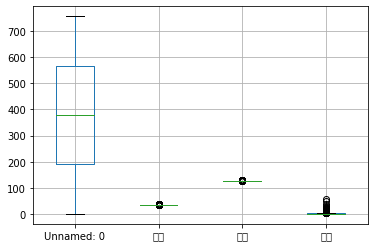

In [81]:
df.boxplot()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


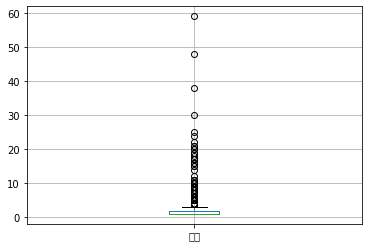

In [82]:
df[['빈도']].boxplot()

In [65]:
import folium

In [83]:
Mt_Hanla = [33.3625, 126.53369]
map = folium.Map(location=Mt_Hanla, zoom_start=11)
map

In [89]:
type(df['빈도'][0])

numpy.int64

In [99]:
Mt_Hanla = [33.3625, 126.53369]
map = folium.Map(location=Mt_Hanla, zoom_start=11)

for i in df.index:
  folium.CircleMarker(
      radius=int(df.빈도[i]),                                   # int64는 처리 불가
      location=[df.위도[i], df.경도[i]],
      popup=folium.Popup(f'{df.공식명칭[i]}', max_width=300),   # popup 누르면 나오는 문구, max_widht 팝업창 넓이
      tooltip=df.공식명칭[i],   # 커서온시 문구
      color='crimson',    # 마커 색
      fill=True,   # 마커 채우기
      fill_color='crimson'
  ).add_to(map)

title = '<h3 align="center" style="font-size:20px">제주도 핫플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

- 2. 그룹으로 표시

In [100]:
from folium.plugins import MarkerCluster

locations, names = [], []
for i in df.index:
  locations.append([df.위도[i], df.경도[i]])
  names.append(df.공식명칭[i])

In [104]:
map = folium.Map(location=Mt_Hanla, zoom_start=11)
MarkerCluster(
    locations = locations,
    popups=names,
    name='제주',
    overlay=True,
    control=True
).add_to(map)
map